# Naive Bayes 

##### Imports

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd


# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import re 
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
# lemmatizer = WordNetLemmatizer() 


# from nltk.stem.porter import PorterStemmer
# from gensim.models import word2vec


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


import seaborn as sns
import matplotlib.pyplot as plt



# !pip install wordcloud
import requests
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import numpy as np
from io import BytesIO
from scipy.sparse import csr_matrix




#### Path to CSV files

In [2]:
path_to_org_files="C:\ML_PROJECTS"
path_to_proc_files="C:\processed csv"

total_dataset_rf="total_dataset_rf.csv"
total_real="total_real.csv"
total_fake="total_fake.csv"

sample_total="sample_total.csv"
sample_real="sample_real.csv"
sample_fake="sample_fake.csv"


sample_size=5000



In [3]:
originaldataset = [f for f in listdir(path_to_org_files) if isfile(join(path_to_org_files, f))]
print(originaldataset)

['articles1.csv', 'articles2.csv', 'articles3.csv', 'fake.csv']


##### 0--> fake   1--->real

#### Modifiying datasets 

In [4]:
# total real
l=list()
for i in range(3):
    real_data_csv= path_to_org_files+"\\"+originaldataset[i]
    df_real_org=pd.read_csv(real_data_csv, usecols=[2,9])
    print(df_real_org.shape , "    [" ,originaldataset[i],"]")
    print("\n")
    print(df_real_org.head())
    print("\n\n--------------------------------------------------------------\n\n")
    # adding labels
    df_real_org['label']=1
    l.append(df_real_org)

real_data_csv_final=path_to_proc_files+"\\"+total_real
df_total_real=pd.concat(l)


print(df_total_real.shape, "    [" ,total_real,"]")
print("\n")
print(df_total_real.head())
print("\n\n--------------------------------------------------------------\n\n")



# checking null values

print("Total null entries  --  ",df_total_real.isnull().sum().sum())
bool_have_null =pd.isnull(df_total_real['content'])
print("\n\n--------------------------------------------------------------\n\n")
print(df_total_real[bool_have_null])
print("\n\n--------------------------------------------------------------\n\n")
bool_have_null =pd.isnull(df_total_real['title'])
print("\n\n--------------------------------------------------------------\n\n")
print(df_total_real[bool_have_null])
print("\n\n--------------------------------------------------------------\n\n")
df_total_real.dropna(inplace=True)
print("Total null entries  --  ",df_total_real.isnull().sum().sum())
print("\n\n--------------------------------------------------------------\n\n")




df_total_real.to_csv(real_data_csv_final)




# sample real
sample_real_data_csv_final=path_to_proc_files+"\\"+sample_real
df_total_real_sample =df_total_real.sample(sample_size)
df_total_real_sample.to_csv(sample_real_data_csv_final)
print(df_total_real_sample.shape, "    [" ,sample_real,"]")
print("\n")
print(df_total_real_sample.head())
print("\n\n--------------------------------------------------------------\n\n")




(50000, 2)     [ articles1.csv ]


                                               title  \
0  House Republicans Fret About Winning Their Hea...   
1  Rift Between Officers and Residents as Killing...   
2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4  Kim Jong-un Says North Korea Is Preparing to T...   

                                             content  
0  WASHINGTON  —   Congressional Republicans have...  
1  After the bullet shells get counted, the blood...  
2  When Walt Disney’s “Bambi” opened in 1942, cri...  
3  Death may be the great equalizer, but it isn’t...  
4  SEOUL, South Korea  —   North Korea’s leader, ...  


--------------------------------------------------------------


(49999, 2)     [ articles2.csv ]


                                               title  \
0  Patriots Day Is Best When It Digs Past the Her...   
1  A Break in the Search for the Origin of Comple...   
2         Obama’s Ingenious 

In [5]:
# total fake
fake_data_csv= path_to_org_files+"\\"+originaldataset[3]
df_fake_org=pd.read_csv(fake_data_csv, usecols=[4,5])

# renaming col  text---->content
df_fake_org.rename(columns={"text": "content"},inplace=True)

# adding labels
df_fake_org['label']=0


print(df_fake_org.shape , "    [" ,originaldataset[3],"]")
print("\n")
print(df_fake_org.head())
print("\n\n--------------------------------------------------------------\n\n")




# null entries

print("Total null entries  --  ",df_fake_org.isnull().sum().sum())
bool_have_null =pd.isnull(df_fake_org['content'])
print("\n\n--------------------------------------------------------------\n\n")
print(df_fake_org[bool_have_null])
print("\n\n--------------------------------------------------------------\n\n")
bool_have_null =pd.isnull(df_fake_org['title'])
print("\n\n--------------------------------------------------------------\n\n")
print(df_fake_org[bool_have_null])
print("\n\n--------------------------------------------------------------\n\n")
df_fake_org.dropna(inplace=True)
print("Total null entries  --  ",df_fake_org.isnull().sum().sum())
print("\n\n--------------------------------------------------------------\n\n")




fake_data_csv_final=path_to_proc_files+"\\"+total_fake
df_fake_org.to_csv(fake_data_csv_final)


print(df_fake_org.shape , "    [" ,total_fake,"]")
print("\n")
print(df_fake_org.head())
print("\n\n--------------------------------------------------------------\n\n")


# l.append(df_real_org)
# df_total_fake=pd.concat(l)



# sample fake
sample_fake_data_csv_final=path_to_proc_files+"\\"+sample_fake
df_total_fake_sample =df_fake_org.sample(sample_size)
df_total_fake_sample.to_csv(sample_fake_data_csv_final)
print(df_total_fake_sample.shape, "    [" ,sample_fake,"]")
print("\n")
print(df_total_fake_sample.head())
print("\n\n--------------------------------------------------------------\n\n")





# adding to list
l.append(df_fake_org)


(12999, 3)     [ fake.csv ]


                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                             content  label  
0  Print They should pay all the back all the mon...      0  
1  Why Did Attorney General Loretta Lynch Plead T...      0  
2  Red State : \nFox News Sunday reported this mo...      0  
3  Email Kayla Mueller was a prisoner and torture...      0  
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...      0  


--------------------------------------------------------------


Total null entries  --   726


--------------------------------------------------------------


                                                  title content  label
5555  Sur Twitter, Donald T

In [6]:
# total dataset

total_data_r_f_csv= path_to_proc_files+"\\"+total_dataset_rf
df_total_data_r_f=pd.concat(l)
df_total_data_r_f.to_csv(total_data_r_f_csv)
print(df_total_data_r_f.shape , "    [" ,total_dataset_rf,"]")
print("\n")
print(df_total_data_r_f.head())
print("\n\n--------------------------------------------------------------\n\n")


# sample total
sample_total_data_r_f_csv= path_to_proc_files+"\\"+sample_total
df_total_data_r_f_sample=pd.concat( [df_total_real_sample , df_total_fake_sample])
df_total_data_r_f_sample.to_csv(sample_total_data_r_f_csv)
print(df_total_data_r_f_sample.shape , "    [" ,sample_total,"]")
print("\n")
print(df_total_data_r_f_sample.head())
print("\n\n--------------------------------------------------------------\n\n")



(154843, 3)     [ total_dataset_rf.csv ]


                                               title  \
0  House Republicans Fret About Winning Their Hea...   
1  Rift Between Officers and Residents as Killing...   
2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4  Kim Jong-un Says North Korea Is Preparing to T...   

                                             content  label  
0  WASHINGTON  —   Congressional Republicans have...      1  
1  After the bullet shells get counted, the blood...      1  
2  When Walt Disney’s “Bambi” opened in 1942, cri...      1  
3  Death may be the great equalizer, but it isn’t...      1  
4  SEOUL, South Korea  —   North Korea’s leader, ...      1  


--------------------------------------------------------------


(10000, 3)     [ sample_total.csv ]


                                                   title  \
13103  Sessions On Backlash To Hawaii Remark: ’Nobody...   
13645  The Media Is Ign

###### only removing stopwords

######  randomizing sample file

In [7]:
df_sample=df_total_data_r_f_sample
df_sample.sample(frac=1)

,title,content,label
33308,"White House demands deep cuts to State, UN funds",(CNN) The White House has instructed the Stat...,1
12310,"Students at the University of California, Berk...",We Are Change \nBy Bradford Richardson – The W...,0
6136,US Calls On Saudi Arabia To End Airstrikes Aga...,Videos US Calls On Saudi Arabia To End Airstri...,0
10149,A mechanic wrote the customer’s bizarrely crea...,Next Prev Swipe left/right A mechanic wrote th...,0
26438,"Spare Us the Overwrought 9/11 Analogies, Donald","My old friends Dennis Prager, Bill Bennett, an...",1
...,...,...,...
7172,NYT Criticized for Its Dishonesty by Its Own P...,NYT Criticized for Its Dishonesty by Its Own P...,0
5529,Bombing at Bangladesh’s Largest Eid Gathering ...,"DHAKA, Bangladesh — A bombing at Bangladesh...",1
4406,Only 3 Countries Left Without a ROTHSCHILD Cen...,Only 3 Countries Left Without a ROTHSCHILD Cen...,0
34287,Brexit: Irish border at forefront of talks,(CNN) The European Union has said that resolv...,1


In [8]:
y=df_sample.label
df_sample.drop('label',axis=1,inplace=True)
df_sample

,title,content
13103,Sessions On Backlash To Hawaii Remark: ’Nobody...,Attorney General Jeff Sessions on Sunday on Su...
13645,The Media Is Ignoring the 500-Pound Surveillan...,The Mainstream media are watching their Russia...
23854,"Trump: ’I’m Very, Very Strong on Israel’ - Bre...",Donald Trump told reporters at on Wednesd...
25145,The View’s Raven-Symoné Vows to Leave US ‘If A...,"Thursday on ABC’s “The View,” declared she..."
48393,Bill Gates talked Microsoft out of trying to b...,"’’ ’In March, reports emerged that Microsoft w..."
...,...,...
6711,‘Suspicious object’ at Daily Mail offices iden...,Monday 14 November 2016 by Davywavy and Spacey...
7398,Russia did not let Turkish planes enter Syrian...,Russia did not let Turkish planes enter Syrian...
8264,¿Y ahora qué? Oposición venezolana patea la me...,¿Y ahora qué? Oposición venezolana patea la me...
8559,"Arianna Huffington, journalist: echo chamber f...",Leave a reply \nJon Rappoport – Arianna Stassi...


##### Test_Train_Split

In [9]:
xtrain,xtest,ytrain,ytest= train_test_split(df_sample['content'],y,test_size=0.33,random_state=53)

print(xtrain.head(),"\n\n")
print(xtest.head(),"\n\n")

print(xtrain.shape)
print(xtest.shape)

12519    Share on Facebook “Everyone should know that m...
8969     0 4 0 1 Americans will not vote for Republican...
16418    During the January 31 airing of This Week with...
1196     A new bill proposing restrictions on lucrative...
20255    During the June 20 airing of ABC’s The View, W...
Name: content, dtype: object 


30386    Human rights groups are condemning The Economi...
1589     Email \nOne year ago, I was arrested for both ...
25552    Marriage is a simple agreement. It requires wh...
2789     , I want to receive updates from partners and ...
3764     Go to Article \nDaniel Greenfield, a Shillman ...
Name: content, dtype: object 


(6700,)
(3300,)


##### CountVectorizer

In [10]:
countvectorizer=CountVectorizer(stop_words='english')
ctrainx=countvectorizer.fit_transform(xtrain)
ctestx=countvectorizer.transform(xtest)

print(ctrainx.shape)
print(ctestx.shape)

print(type(ctrainx))
print(type(ctestx))        

(6700, 101999)
(3300, 101999)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [11]:
ctrainx[0]

<1x101999 sparse matrix of type '<class 'numpy.int64'>'
	with 377 stored elements in Compressed Sparse Row format>

In [12]:
ctrainx[1]

<1x101999 sparse matrix of type '<class 'numpy.int64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [13]:
print(ctrainx[1])

  (0, 60176)	1
  (0, 78016)	1
  (0, 24290)	1
  (0, 47416)	1
  (0, 54692)	1
  (0, 76314)	1
  (0, 5109)	1
  (0, 70126)	1
  (0, 27225)	1
  (0, 32716)	1
  (0, 34563)	2
  (0, 5114)	1
  (0, 86417)	1
  (0, 67655)	2
  (0, 63796)	1
  (0, 86073)	2
  (0, 83887)	3
  (0, 76330)	3
  (0, 24295)	2
  (0, 22061)	2
  (0, 55864)	1
  (0, 37813)	1
  (0, 16554)	5
  (0, 13686)	2
  (0, 65432)	2
  :	:
  (0, 87110)	1
  (0, 19413)	1
  (0, 48151)	1
  (0, 6595)	1
  (0, 17412)	1
  (0, 52159)	1
  (0, 88385)	1
  (0, 73176)	1
  (0, 24296)	1
  (0, 12565)	1
  (0, 40453)	1
  (0, 86428)	1
  (0, 13683)	1
  (0, 63960)	1
  (0, 67660)	1
  (0, 40456)	1
  (0, 3991)	1
  (0, 36818)	1
  (0, 56162)	1
  (0, 72167)	1
  (0, 83855)	1
  (0, 20502)	1
  (0, 27284)	1
  (0, 39341)	1
  (0, 27016)	1


In [14]:
b=ctrainx[1].toarray()
print(b,"\n")
print(type(b))
for i in np.nditer( b.T ):
    if i!=0:
        print(i,end=' ')

[[0 0 0 ... 0 0 0]] 

<class 'numpy.ndarray'>
1 1 2 1 1 2 1 1 1 1 1 1 1 2 5 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 3 1 1 6 1 3 2 1 1 1 1 2 1 1 

##### TfidfVectorizer

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7 )
ttrainx = tfidf_vectorizer.fit_transform(xtrain)
ttestx = tfidf_vectorizer.transform(xtest)

print(ttrainx.shape)
print(ttestx.shape)

print(type(ttrainx))
print(type(ttestx))        

(6700, 101999)
(3300, 101999)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [16]:
ttrainx[0]

<1x101999 sparse matrix of type '<class 'numpy.float64'>'
	with 377 stored elements in Compressed Sparse Row format>

In [17]:
ttrainx[1]

<1x101999 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [18]:
print(ttrainx[1])

  (0, 27016)	0.07880683280292954
  (0, 39341)	0.09801320645582284
  (0, 27284)	0.07337304236034381
  (0, 20502)	0.1077181147883653
  (0, 83855)	0.07237557514566839
  (0, 72167)	0.07356908288927219
  (0, 56162)	0.06958184446597314
  (0, 36818)	0.08014870184002622
  (0, 3991)	0.07637641624252701
  (0, 40456)	0.11797841526625807
  (0, 67660)	0.06364827929971673
  (0, 63960)	0.08889738275112911
  (0, 13683)	0.08389951624035388
  (0, 86428)	0.062372609130239565
  (0, 40453)	0.07337304236034381
  (0, 12565)	0.06611699357050883
  (0, 24296)	0.14349533731335
  (0, 73176)	0.07678004055620291
  (0, 88385)	0.05809104480480004
  (0, 52159)	0.1008713237220831
  (0, 17412)	0.06504673120008106
  (0, 6595)	0.07966825827594903
  (0, 48151)	0.05120799138994212
  (0, 19413)	0.04497435072117667
  (0, 87110)	0.040420089414337126
  :	:
  (0, 65432)	0.1570988084223492
  (0, 13686)	0.09290751278065719
  (0, 16554)	0.22536965359204156
  (0, 37813)	0.04639423038764468
  (0, 55864)	0.06838078619048366
  (0, 2206

In [19]:
b=ttrainx[1].toarray()
print(b,"\n")
print(type(b))
for i in np.nditer( b.T ):
    if i!=0:
        print(i,end='        ')

[[0. 0. 0. ... 0. 0. 0.]] 

<class 'numpy.ndarray'>
0.07637641624252701        0.09264771109863947        0.0976763003034534        0.044689555547283565        0.055019796466420294        0.185833847549246        0.07966825827594903        0.07559387134964857        0.0760371093912177        0.06611699357050883        0.0697021834826601        0.10281677615741852        0.08389951624035388        0.09290751278065719        0.22536965359204156        0.06504673120008106        0.04497435072117667        0.0955273990522284        0.1077181147883653        0.11136905118508211        0.1345117894584641        0.08731683115477365        0.21485259124725561        0.14349533731335        0.07880683280292954        0.049694546721366625        0.09476579296244218        0.07337304236034381        0.12010435803250075        0.08979702098771387        0.1218699617220795        0.09632061594539154        0.14885088609848496        0.058647040493039246        0.08663166560913833        0.080148701

##### HashingVectorizer

In [20]:
hashvectorizer = HashingVectorizer(stop_words='english', alternate_sign=False)
htrainx = hashvectorizer.fit_transform(xtrain)
htestx = hashvectorizer.transform(xtest)



print(htrainx.shape)
print(htestx.shape)

print(type(htrainx))
print(type(htestx))        
# no. of features here are diffrent then tfidf and count

(6700, 1048576)
(3300, 1048576)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [21]:
htrainx[0]

<1x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 377 stored elements in Compressed Sparse Row format>

In [22]:
htrainx[1]

<1x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [23]:
print(htrainx[1])

  (0, 5759)	0.06757373783994859
  (0, 42855)	0.06757373783994859
  (0, 49954)	0.06757373783994859
  (0, 73828)	0.13514747567989718
  (0, 104459)	0.06757373783994859
  (0, 111283)	0.06757373783994859
  (0, 127129)	0.06757373783994859
  (0, 140236)	0.06757373783994859
  (0, 147597)	0.06757373783994859
  (0, 168762)	0.33786868919974294
  (0, 181440)	0.06757373783994859
  (0, 195726)	0.13514747567989718
  (0, 202140)	0.06757373783994859
  (0, 211591)	0.13514747567989718
  (0, 211663)	0.06757373783994859
  (0, 219649)	0.13514747567989718
  (0, 231559)	0.06757373783994859
  (0, 238097)	0.13514747567989718
  (0, 238745)	0.06757373783994859
  (0, 247954)	0.13514747567989718
  (0, 255809)	0.13514747567989718
  (0, 272188)	0.06757373783994859
  (0, 276774)	0.06757373783994859
  (0, 300083)	0.06757373783994859
  (0, 309146)	0.06757373783994859
  :	:
  (0, 836512)	0.06757373783994859
  (0, 856000)	0.13514747567989718
  (0, 890884)	0.06757373783994859
  (0, 899147)	0.06757373783994859
  (0, 900328)

In [24]:
b=htrainx[1].toarray()
print(b,"\n")
print(type(b))
for i in np.nditer( b.T ):
    if i!=0:
        print(i,end='        ')

[[0. 0. 0. ... 0. 0. 0.]] 

<class 'numpy.ndarray'>
0.06757373783994859        0.06757373783994859        0.06757373783994859        0.13514747567989718        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.33786868919974294        0.06757373783994859        0.13514747567989718        0.06757373783994859        0.13514747567989718        0.06757373783994859        0.13514747567989718        0.06757373783994859        0.13514747567989718        0.06757373783994859        0.13514747567989718        0.13514747567989718        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.13514747567989718        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.06757373783994859        0.13514747567989718        0.06757373783994859        0.06757373783994859        0.0

In [25]:
print(type(countvectorizer.vocabulary_),"\n")
list(countvectorizer.vocabulary_.items())[:10]

<class 'dict'> 



[('share', 72646),
 ('facebook', 29500),
 ('know', 45108),
 ('cancer', 13753),
 ('research', 67744),
 ('largely', 46260),
 ('fraud', 32074),
 ('major', 49162),
 ('organisations', 57816),
 ('derelict', 22428)]

In [26]:
print(type(tfidf_vectorizer.vocabulary_),"\n")
list(tfidf_vectorizer.vocabulary_.items())[:10]

<class 'dict'> 



[('share', 72646),
 ('facebook', 29500),
 ('know', 45108),
 ('cancer', 13753),
 ('research', 67744),
 ('largely', 46260),
 ('fraud', 32074),
 ('major', 49162),
 ('organisations', 57816),
 ('derelict', 22428)]

## MultinomialNB 

###### MultinomialNB    count vector

In [27]:
nb_countclassifier=MultinomialNB(alpha=0.03)
nb_countclassifier.fit(ctrainx,ytrain)
c_nb_pred=nb_countclassifier.predict(ctestx)
c_nb_accuracy=metrics.accuracy_score(ytest,c_nb_pred)
c_nb_accuracy

0.8524242424242424

###### MultinomialNB    tfidf vector

In [28]:
nb_tfidfclassifier=MultinomialNB(alpha=0.03)
nb_tfidfclassifier.fit(ttrainx,ytrain)
t_nb_pred=nb_tfidfclassifier.predict(ttestx)
t_nb_accuracy=metrics.accuracy_score(ytest,t_nb_pred)
t_nb_accuracy

0.8615151515151516

###### MultinomialNB    hash vector

In [29]:
nb_hashclassifier=MultinomialNB(alpha=0.03)
nb_hashclassifier.fit(htrainx,ytrain)
h_nb_pred=nb_hashclassifier.predict(htestx)
h_nb_accuracy=metrics.accuracy_score(ytest,h_nb_pred)
h_nb_accuracy

0.8484848484848485

##### WordCloud

In [30]:
color = sns.color_palette()
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(16.0,8.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=600, 
                    height=300,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

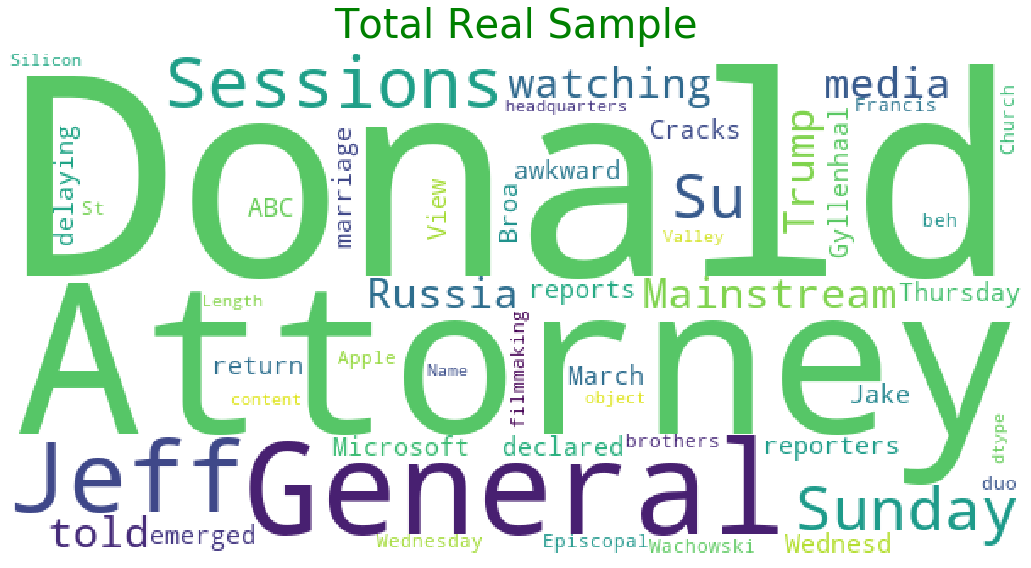

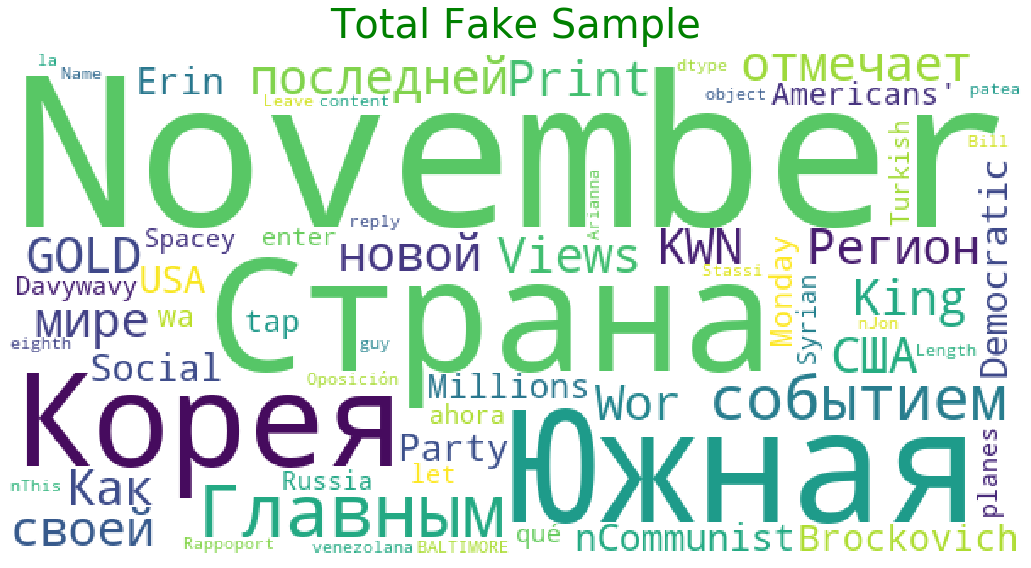

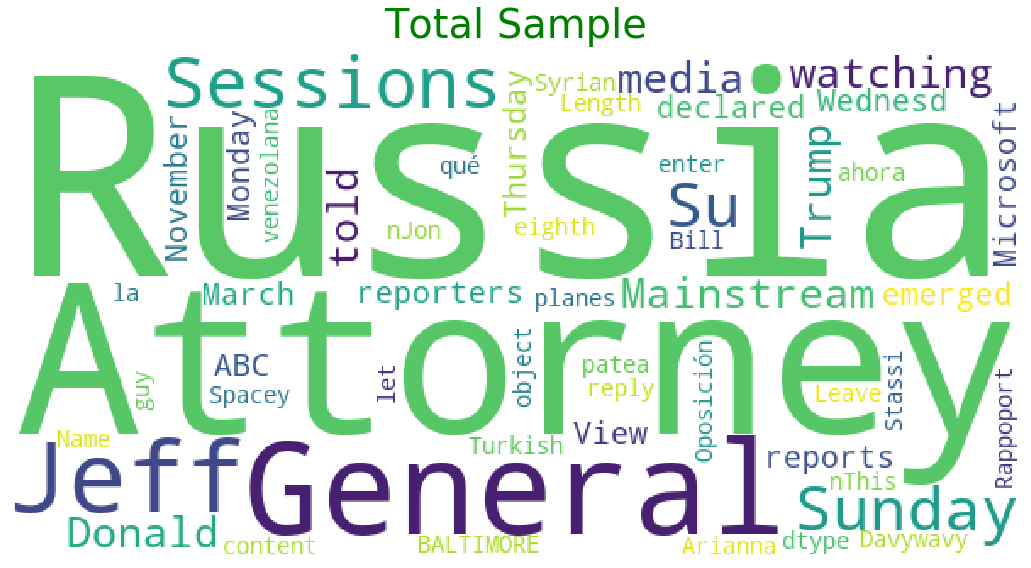

In [31]:
# url='https://github.com/newbie-neeraj/fake_news_detection/blob/master/Picture1.png'
# response = requests.get(url)
# upvote_mask = np.array(Image.open(BytesIO(response.content)))
plot_wordcloud(  df_total_real_sample["content"], max_words=300000, max_font_size=300, title="Total Real Sample")
plot_wordcloud(  df_total_fake_sample["content"], max_words=300000, max_font_size=300, title="Total Fake Sample")
plot_wordcloud(  df_sample["content"], max_words=300000, max_font_size=300, title="Total Sample")

###### naive bayes   most_informative_words  countvectorizer

In [32]:
nbc=nb_countclassifier.coef_[0]
nbc_features=countvectorizer.get_feature_names()
print(type(nbc))
print(nbc)
print(nbc.shape)
most_informative_words_nbc=sorted(zip(nbc,nbc_features),reverse=True) #most important first
nbc_r =most_informative_words_nbc[:20]  # for real  most informative 20
nbc_f =most_informative_words_nbc[-20:] # for fake  most informative 20
print('\n',nbc_r,'\n\n')
print(nbc_f,'\n\n')

<class 'numpy.ndarray'>
[-10.11334389  -6.78651472 -13.35712857 ... -17.57172226 -17.57172226
 -17.57172226]
(101999,)

 [(-4.557833129713977, 'said'), (-4.79316178964895, 'trump'), (-5.347150123405861, 'people'), (-5.5273786598668355, 'new'), (-5.687916230340907, 'like'), (-5.741305951518354, 'president'), (-5.832450378306296, 'just'), (-5.941004870461121, 'time'), (-6.017645254752779, 'says'), (-6.041274543530273, 'clinton'), (-6.0547948135875895, 'years'), (-6.088902113187754, 'state'), (-6.196133513908582, 'told'), (-6.211547899101727, 'year'), (-6.277355041543654, 'don'), (-6.302130298577921, 'house'), (-6.317554570640266, 'obama'), (-6.323617741274264, 'make'), (-6.323617741274264, 'did'), (-6.331467657076356, 'campaign')] 


[(-17.571722259937115, '027'), (-17.571722259937115, '025'), (-17.571722259937115, '021'), (-17.571722259937115, '016s'), (-17.571722259937115, '016'), (-17.571722259937115, '013c2812c9'), (-17.571722259937115, '013'), (-17.571722259937115, '0128'), (-17.571

###### naive bayes   most_informative_words  tfidfvectorizer

In [33]:
nbt=nb_tfidfclassifier.coef_[0]
nbt_features=tfidf_vectorizer.get_feature_names()
print(type(nbt))
print(nbt)
print(nbt.shape)
most_informative_words_nbt=sorted(zip(nbt,nbt_features),reverse=True) #most important first
nbt_r =most_informative_words_nbt[:20]  # for real  most informative 20
nbt_f =most_informative_words_nbt[-20:] # for fake  most informative 20
print('\n',nbt_r,'\n\n')
print(nbt_f,'\n\n')

<class 'numpy.ndarray'>
[-10.03248301  -7.42231088 -12.28990356 ... -14.07735794 -14.07735794
 -14.07735794]
(101999,)

 [(-5.537539848183263, 'trump'), (-5.64607823337406, 'said'), (-6.419577681302888, 'people'), (-6.469284984379717, 'president'), (-6.522124401669862, 'new'), (-6.63849366089363, 'clinton'), (-6.751123704849386, 'like'), (-6.794509427150524, 'says'), (-6.805658536236175, 'obama'), (-6.8077011419063975, 'mr'), (-6.8369296383719895, 'percent'), (-6.866602390531835, 'just'), (-6.870101001050145, 'state'), (-6.871292963884578, 'house'), (-6.9414041701562805, 'told'), (-6.948817544333471, 'time'), (-6.9493027722243585, 'campaign'), (-6.97645013099755, 'news'), (-6.985419461578926, 'years'), (-7.020610252313249, 'year')] 


[(-14.077357944636908, '027'), (-14.077357944636908, '025'), (-14.077357944636908, '021'), (-14.077357944636908, '016s'), (-14.077357944636908, '016'), (-14.077357944636908, '013c2812c9'), (-14.077357944636908, '013'), (-14.077357944636908, '0128'), (-14.

###### naive bayes   most_informative_words  hashvectorizer

In [34]:
nbh=nb_hashclassifier.coef_[0]
print(type(nbh))
print(nbh)
print(nbh.shape)
most_informative_encoding_nbh=sorted(nbh,reverse=True) #most important first
nbh_r =most_informative_encoding_nbh[:20]  # for real  most informative 20
nbh_f =most_informative_encoding_nbh[-20:] # for fake  most informative 20
print('\n',nbh_r,'\n\n')
print(nbh_f,'\n\n')

<class 'numpy.ndarray'>
[ -8.17349548 -14.63961837 -14.63961837 ... -14.63961837 -14.63961837
 -14.63961837]
(1048576,)

 [-5.142251453024797, -5.439751606558818, -6.001221651803092, -6.109490847223344, -6.304085034948519, -6.369216459693699, -6.477654958891976, -6.57045907561528, -6.685651011409832, -6.707359772238872, -6.710262387933902, -6.7373090241812035, -6.769465400396935, -6.788222026375281, -6.832703787039977, -6.863501252930672, -6.921218958829356, -6.924900843390799, -6.946636981894832, -6.969772118723997] 


[-14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846, -14.639618374247846] 


